In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
investments_df = pd.read_csv("investments.csv", encoding = 'ISO-8859-1').dropna()

In [4]:
rounds_df = pd.read_csv("rounds.csv", encoding = 'ISO-8859-1').drop('Unnamed: 16', axis = 1).dropna()

In [25]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
#     'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
#     'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
#     'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
#     'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [33]:
companies_df = pd.read_csv("companies.csv", encoding = 'ISO-8859-1').dropna()
companies_df = companies_df.drop_duplicates(subset = ['name'])
companies_df.rename(columns = lambda x: x.strip(), inplace = True)

companies_df['city'] = companies_df['city'].astype(str)
companies_df['market'] = companies_df['market'].apply(lambda x: x.strip())

companies_df['funding_total_usd'] = companies_df['funding_total_usd'].apply(lambda x: x.replace(',', '').strip())
companies_df = companies_df[companies_df['funding_total_usd'] != '-']

for col in ['funding_total_usd', 'founded_year', 'funding_rounds']:
    companies_df[col] = companies_df[col].astype(int)

In [34]:
worldcities_df = pd.read_csv("worldcities.csv")
worldcities_df = worldcities_df[worldcities_df['country'] == 'United States'][['city', 'lat', 'lng', 'admin_name']]
worldcities_df.rename(columns={"admin_name": "state"}, inplace = True)
worldcities_df['city'] = worldcities_df['city'].astype(str)
worldcities_df['state_code'] = worldcities_df['state'].apply(lambda x: us_state_abbrev[x])

In [35]:
# worldcities_df

,city,lat,lng,state,state_code
12,New York,40.6943,-73.9249,New York,NY
27,Los Angeles,34.1139,-118.4068,California,CA
49,Chicago,41.8373,-87.6862,Illinois,IL
93,Miami,25.7839,-80.2102,Florida,FL
108,Dallas,32.7936,-96.7662,Texas,TX
...,...,...,...,...,...
25841,Oak Park Heights,45.0324,-92.8099,Minnesota,MN
25842,Midfield,33.4552,-86.9226,Alabama,AL
25843,Gillespie,39.1258,-89.8173,Illinois,IL
25845,Hockinson,45.7302,-122.4833,Washington,WA


In [36]:
# worldcities_df[worldcities_df['city'] == 'Lexington']

In [37]:
merge_df = companies_df.merge(worldcities_df, how = 'inner', left_on = ['city', 'state_code'], right_on = ['city', 'state_code'])

for col in ['lat', 'lng']:
    merge_df[col] = merge_df[col].astype(float)

In [39]:
# merge_df[merge_df['city'] == 'Lexington']

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,lat,lng,state
3892,/organization/10x10-room,10X10 Room,http://10x10room.com,|Software|,Software,77500,operating,USA,MA,Boston,...,1,2010-01-01,2010-01,2010-Q1,2010,2011-10-12,2011-10-12,42.4456,-71.2307,Massachusetts
3893,/organization/above-solutions,ABOVE Solutions,http://above-inc.com,|Software|,Software,450000,operating,USA,MA,Boston,...,1,2008-07-01,2008-07,2008-Q3,2008,2011-08-16,2011-08-16,42.4456,-71.2307,Massachusetts
3894,/organization/acusphere,Acusphere,http://www.acusphere.com,|Biotechnology|,Biotechnology,10000000,operating,USA,MA,Boston,...,2,1993-01-01,1993-01,1993-Q1,1993,2011-07-07,2012-02-23,42.4456,-71.2307,Massachusetts
3895,/organization/adapteva,Adapteva,http://www.adapteva.com,|Mobile|Internet|Semiconductors|,Mobile,5954000,operating,USA,MA,Boston,...,3,2008-03-15,2008-03,2008-Q1,2008,2009-10-27,2014-01-16,42.4456,-71.2307,Massachusetts
3896,/organization/agenus,Agenus,http://agenusbio.com,|Biotechnology|,Biotechnology,15000000,operating,USA,MA,Boston,...,2,1994-01-01,1994-01,1994-Q1,1994,2009-08-04,2013-04-25,42.4456,-71.2307,Massachusetts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15030,/organization/viamedia,Viamedia,http://www.viamediatv.com,|Advertising|,Advertising,40000000,operating,USA,KY,Lexington,...,1,2001-01-01,2001-01,2001-Q1,2001,2013-12-18,2013-12-18,38.0423,-84.4587,Kentucky
15031,/organization/volar-video,Volar Video,http://volarvideo.com,|Software|Digital Media|,Software,1327000,operating,USA,KY,Lexington,...,2,2012-01-01,2012-01,2012-Q1,2012,2013-08-22,2013-12-10,38.0423,-84.4587,Kentucky
15032,/organization/fittingroom,WeStyle,http://www.westyleapp.com,|Social Commerce|Lifestyle|Fashion|Mobile|,Social Commerce,313000,operating,USA,KY,Lexington,...,2,2013-06-01,2013-06,2013-Q2,2013,2013-11-01,2014-08-01,38.0423,-84.4587,Kentucky
15033,/organization/xooker,Xooker,https://gust.com/companies/xooker,|Messaging|3D|Games|Gamification|Incentives|Lo...,3D,900000,operating,USA,KY,Lexington,...,2,2013-03-16,2013-03,2013-Q1,2013,2013-10-15,2014-01-01,38.0423,-84.4587,Kentucky


In [149]:
merge_df.market = merge_df.market.apply(lambda x: 'Software' if 'Software' in x else x)

In [150]:
merge_df.market = merge_df.market.apply(lambda x: 'Health' if 'Health' in x else x)

In [151]:
merge_df.to_csv("companies_final.csv")

In [152]:
merge_df

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,lat,lng
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000,acquired,USA,NY,New York City,New York,1,2012-06-01,2012-06,2012-Q2,2012,2012-06-30,2012-06-30,40.6943,-73.9249
1,/organization/1010data,1010data,http://www.1010data.com,|Software|,Software,35000000,operating,USA,NY,New York City,New York,1,2000-01-01,2000-01,2000-Q1,2000,2010-03-08,2010-03-08,40.6943,-73.9249
2,/organization/1stdibs,1stdibs,http://www.1stdibs.com,|E-Commerce|,E-Commerce,117000000,operating,USA,NY,New York City,New York,4,2001-01-01,2001-01,2001-Q1,2001,2011-11-03,2014-01-24,40.6943,-73.9249
3,/organization/20x200,20x200,http://www.20x200.com,|Social Commerce|Art|E-Commerce|,Art,2800000,operating,USA,NY,New York City,New York,2,2007-09-01,2007-09,2007-Q3,2007,2009-10-01,2010-08-01,40.6943,-73.9249
4,/organization/33across,33Across,http://www.33across.com,|Social Network Media|Advertising|,Advertising,25654560,operating,USA,NY,New York City,New York,5,2007-09-01,2007-09,2007-Q3,2007,2009-02-06,2012-07-19,40.6943,-73.9249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17838,/organization/yashi,Yashi,http://www.yashi.com,|Video|Advertising|,Video,7250000,operating,USA,NJ,Atlantic City,Toms River,4,2007-08-22,2007-08,2007-Q3,2007,2010-12-17,2014-09-16,39.9895,-74.1654
17839,/organization/yougotlistings,YouGotListings,http://www.yougotlistings.com,|Real Estate|,Real Estate,150000,operating,USA,MD,Baltimore,Fallston,1,2009-01-01,2009-01,2009-Q1,2009,2011-03-06,2011-03-06,39.5332,-76.4452
17840,/organization/your-survival,Your Survival,http://www.yoursurvival.com,|Curated Web|,Curated Web,425000,closed,USA,CT,CT - Other,Southport,1,2006-10-01,2006-10,2006-Q4,2006,2008-11-10,2008-11-10,42.0400,-76.8774
17841,/organization/yovia,Yovia,http://www.yovia.com,|Social Media Marketing|Social Media|Curated Web|,Social Media Marketing,300000,operating,USA,FL,Jacksonville,Atlantic Beach,1,2006-10-01,2006-10,2006-Q4,2006,2009-05-20,2009-05-20,30.3371,-81.4128


In [154]:
markets = pd.DataFrame(merge_df.groupby('market')['market'].count())
markets.rename(columns={'market': 'count'}, inplace=True)
markets = markets[markets['count'] > 100]
markets.sort_values('count', ascending=False, inplace=True)
markets.reset_index(inplace=True)
markets

,market,count
0,Software,3174
1,Biotechnology,1560
2,Health,1098
3,Mobile,755
4,Curated Web,623
5,E-Commerce,509
6,Advertising,458
7,Clean Technology,413
8,Games,366
9,Education,312


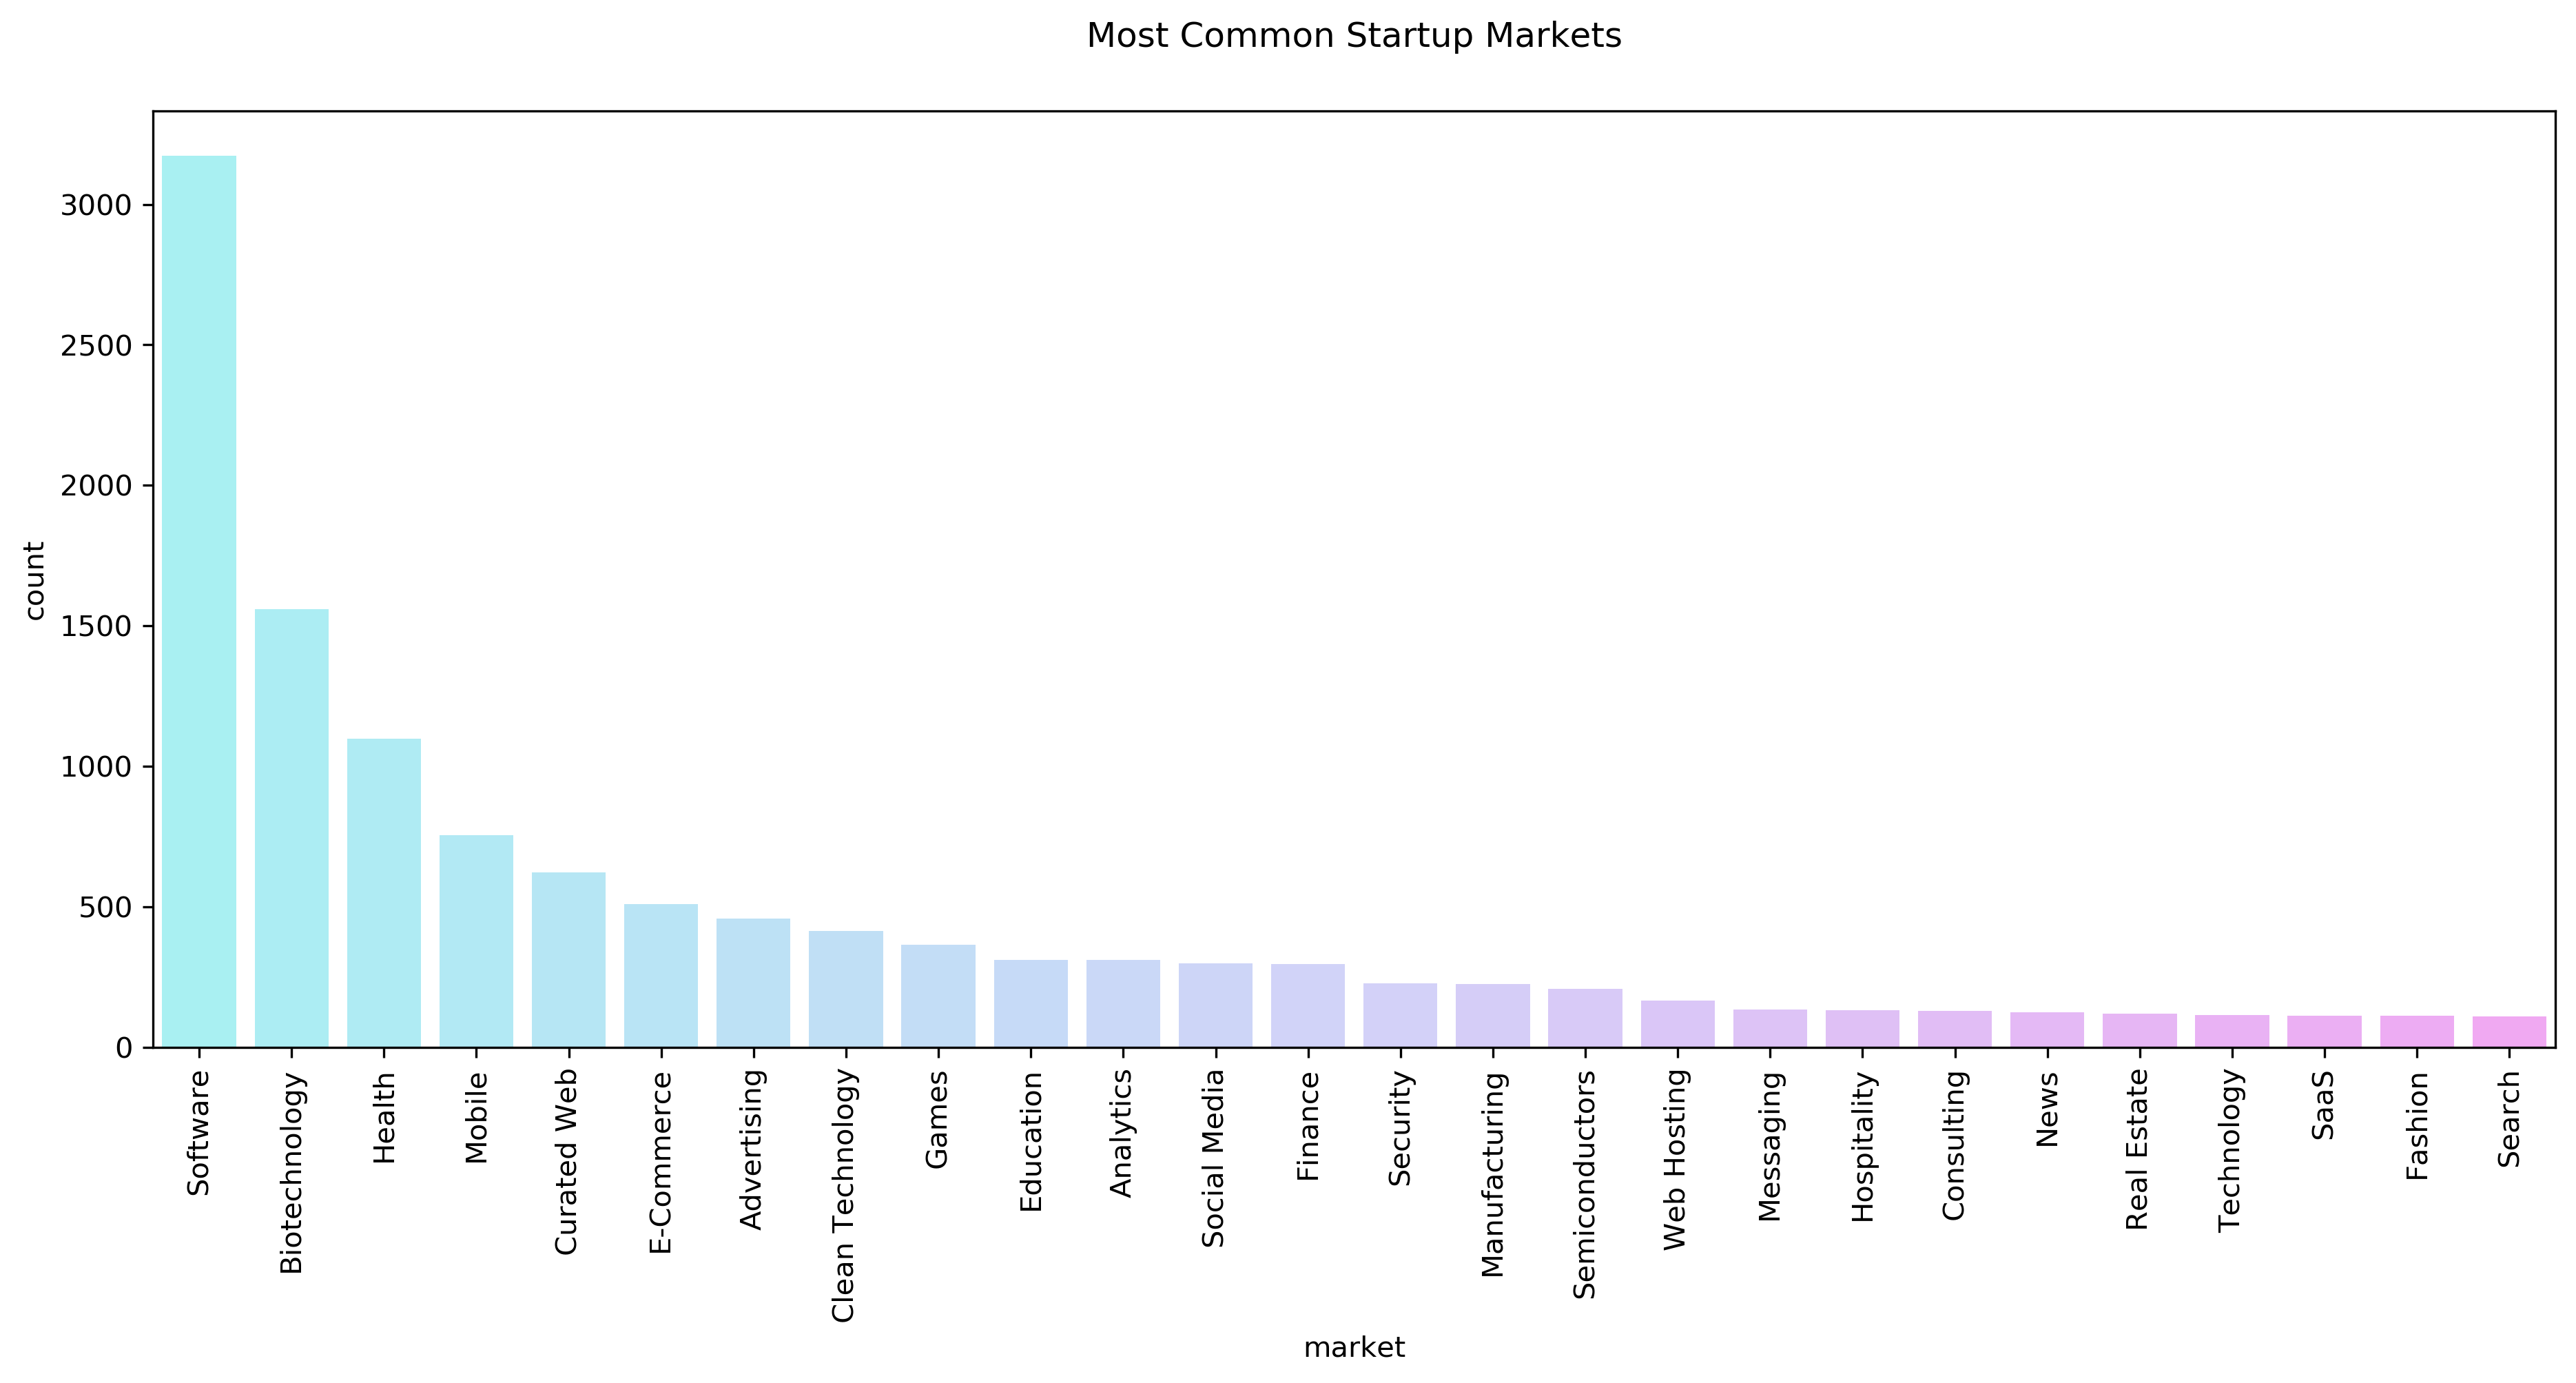

In [155]:
fig, ax = plt.subplots(1,1, figsize=(15,6), dpi=300)
sns.barplot(x='market', y='count', data=markets, ax=ax, palette='cool', alpha=.4)
plt.xticks(rotation=90)
plt.title('Most Common Startup Markets', y=1.05)
plt.show()

In [130]:
aquisitions_df = pd.read_csv("aquisitions.csv", encoding = 'ISO-8859-1').dropna()

In [131]:
aquisitions_df.rename(columns = lambda x: x.strip(), inplace = True)

aquisitions_df['acquirer_name'] = aquisitions_df['acquirer_name'].apply(lambda x: x.strip())

aquisitions_df['price_amount'] = aquisitions_df['price_amount'].apply(lambda x: x.replace(',', '').strip())

In [132]:
aquisitions_df.to_csv("acquisitions_final.csv")

In [133]:
bigCompanies = pd.DataFrame(aquisitions_df.groupby('acquirer_name')['acquirer_name'].count())
bigCompanies.rename(columns={'acquirer_name': 'count'}, inplace=True)
bigCompanies.sort_values('count', ascending=False, inplace=True)
bigCompanies.reset_index(inplace=True)
bigCompanies

,acquirer_name,count
0,Google,34
1,Yahoo!,28
2,Cisco,21
3,AOL,20
4,Microsoft,15
...,...,...
989,Green Courte Partners,1
990,Guidance Software,1
991,HMS Holdings,1
992,HSW International,1
